In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from itertools import chain

In [2]:
sample = 'HV04'
coverage_file = f'{sample}_cov_3000.parquet'
coverage_df = pd.read_parquet(coverage_file)

up_cov_mean = coverage_df.iloc[:2000].mean(axis=0).to_numpy()
down_cov_mean = coverage_df.iloc[4000:].mean(axis=0).to_numpy()
cov_mean = (up_cov_mean + down_cov_mean)/2

norm_cov_df = coverage_df.div(cov_mean).fillna(0)
norm_cov_df = norm_cov_df.loc[:, (norm_cov_df != 0).any(axis=0)]
norm_cov_df.head()

,ENSG00000186092,ENSG00000284662,ENSG00000187634,ENSG00000188976,ENSG00000187961,ENSG00000187583,ENSG00000187642,ENSG00000188290,ENSG00000187608,ENSG00000188157,...,ENSG00000188747,ENSG00000188833,ENSG00000165802,ENSG00000130653,ENSG00000182154,ENSG00000148399,ENSG00000165724,ENSG00000197070,ENSG00000181090,ENSG00000148408
0,0.0,0.0,1.259762,1.42084,0.536442,1.095994,1.01361,0.91434,2.93965,0.291146,...,0.0,0.6885,0.871393,1.228256,1.319748,0.0,0.383225,0.631302,0.812079,0.451859
1,0.0,0.0,1.259762,1.42084,0.536442,1.095994,1.01361,0.91434,2.93965,0.291146,...,0.0,0.6885,0.871393,1.228256,1.319748,0.0,0.383225,0.631302,1.082773,0.451859
2,0.0,0.0,1.259762,1.42084,0.536442,1.095994,1.01361,0.91434,2.93965,0.582292,...,0.0,0.6885,0.871393,1.228256,1.319748,0.0,0.383225,0.631302,1.082773,0.451859
3,0.0,0.0,1.259762,1.42084,0.536442,1.095994,1.01361,0.91434,2.93965,0.582292,...,0.0,0.6885,0.871393,1.228256,1.055799,0.0,0.383225,0.631302,1.082773,0.451859
4,0.0,0.0,1.259762,1.42084,0.536442,1.095994,1.01361,0.91434,2.93965,0.582292,...,0.0,0.6885,0.871393,1.228256,1.055799,0.0,0.383225,0.631302,1.082773,0.451859


In [3]:
wps_file = f'{sample}_wps_3000.parquet'
wps_df = pd.read_parquet(wps_file)

up_wps_mean = wps_df.iloc[:2000].mean(axis=0).to_numpy()
down_wps_mean = wps_df.iloc[4000:].mean(axis=0).to_numpy()
wps_mean = (up_wps_mean + down_wps_mean)/2

norm_wps_df = wps_df.div(wps_mean).fillna(0)
norm_wps_df = norm_wps_df.loc[:, (norm_wps_df != 0).any(axis=0)]
norm_wps_df.head()

,ENSG00000186092,ENSG00000284662,ENSG00000187634,ENSG00000188976,ENSG00000187961,ENSG00000187583,ENSG00000187642,ENSG00000188290,ENSG00000187608,ENSG00000188157,...,ENSG00000188747,ENSG00000188833,ENSG00000165802,ENSG00000130653,ENSG00000182154,ENSG00000148399,ENSG00000165724,ENSG00000197070,ENSG00000181090,ENSG00000148408
0,0.0,5.253004,0.520083,1.1839,-0.443433,0.93034,1.206875,0.452236,3.252567,0.950919,...,-0.0,0.376344,0.720013,-0.000000,0.899437,-0.0,0.938672,0.259058,0.222789,0.378719
1,0.0,5.253004,0.520083,1.1839,-0.443433,0.93034,1.206875,0.452236,3.252567,0.950919,...,-0.0,0.376344,0.720013,-0.000000,0.899437,-0.0,0.938672,0.259058,0.222789,0.378719
2,0.0,5.253004,0.520083,1.1839,-0.443433,0.93034,1.206875,0.452236,3.252567,0.950919,...,-0.0,0.376344,0.720013,0.411195,0.899437,-0.0,0.625782,0.259058,0.222789,0.378719
3,0.0,5.253004,0.520083,1.1839,-0.443433,0.93034,1.206875,0.452236,3.252567,0.950919,...,-0.0,0.376344,0.720013,0.411195,0.899437,-0.0,0.625782,0.259058,0.222789,0.378719
4,0.0,5.253004,0.520083,1.1839,-0.443433,0.93034,1.206875,0.452236,3.252567,0.950919,...,-0.0,0.376344,0.720013,0.411195,0.899437,-0.0,0.625782,0.259058,0.222789,0.378719


In [4]:
expression_df = pd.read_parquet('/mnt/DATA1/resources/protein_atlas/RNAtable.parquet')

bsh = expression_df['bone_marrow'].sort_values(ascending=False).head(1000).index.values.tolist()
bsl = expression_df['bone_marrow'].sort_values(ascending=True).head(1000).index.values.tolist()

lsh= expression_df['lymph_node'].sort_values(ascending=False).head(1000).index.values.tolist()
lsl= expression_df['lymph_node'].sort_values(ascending=True).head(1000).index.values.tolist()

In [5]:
ln_wps_high = norm_wps_df.loc[1999:3999, norm_wps_df.columns.isin(lsh)].copy()
ln_wps_low = norm_wps_df.loc[1999:3999, norm_wps_df.columns.isin(lsl)].copy()
bm_wps_high = norm_wps_df.loc[1999:3999, norm_wps_df.columns.isin(bsh)].copy()
bm_wps_low = norm_wps_df.loc[1999:3999, norm_wps_df.columns.isin(bsl)].copy()

ln_cov_high = norm_cov_df.loc[1999:3999, norm_cov_df.columns.isin(lsh)].copy()
ln_cov_low = norm_cov_df.loc[1999:3999, norm_cov_df.columns.isin(lsl)].copy()
bm_cov_high = norm_cov_df.loc[1999:3999, norm_cov_df.columns.isin(bsh)].copy()
bm_cov_low = norm_cov_df.loc[1999:3999, norm_cov_df.columns.isin(bsl)].copy()

In [6]:
dfs = [ln_wps_high, ln_wps_low, bm_wps_high, bm_wps_low, ln_cov_high, ln_cov_low, bm_cov_high, bm_cov_low]
nuc_range = list(range(-1000, 1001))
melted_dfs = []
for df in dfs:
    plot_df = df.insert(0, "nucleotide", nuc_range, True)
    plot_df = df.melt(id_vars='nucleotide', var_name='cols', value_name='vals')
    melted_dfs.append(plot_df)

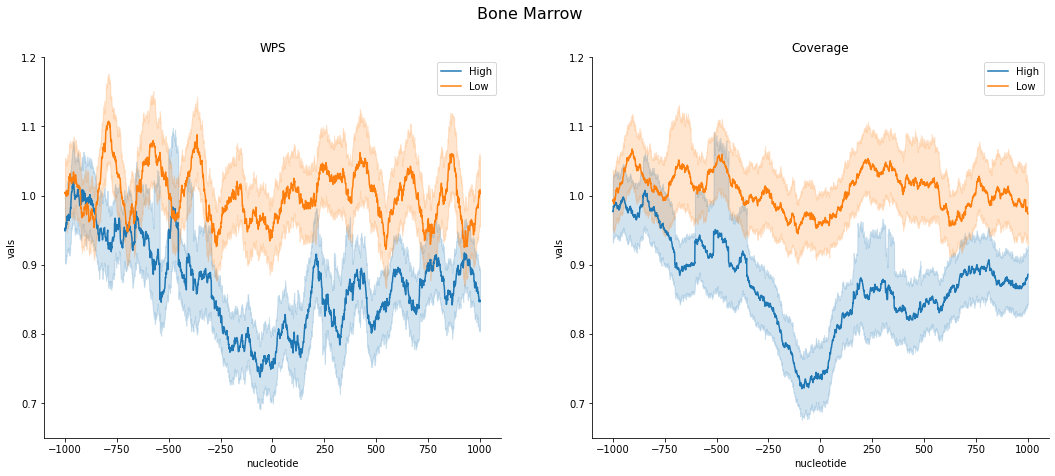

In [7]:
fig, axes = plt.subplots(1,2, figsize=(18, 7))
fig.suptitle("Bone Marrow", fontsize=16)

a = sns.lineplot(ax=axes[0], x='nucleotide', y='vals', data = melted_dfs[2], label='High') 
a.set(title='WPS')
a.axes.set_ylim(0.65, 1.2)
 
b = sns.lineplot(ax=axes[0], x='nucleotide', y='vals', data = melted_dfs[3], label='Low') 
b.axes.set_ylim(0.65, 1.2)

c = sns.lineplot(ax=axes[1], x='nucleotide', y='vals', data = melted_dfs[6], label='High')
c.set(title='Coverage')
c.axes.set_ylim(0.65, 1.2)

d = sns.lineplot(ax=axes[1], x='nucleotide', y='vals', data = melted_dfs[7], label='Low')
d.axes.set_ylim(0.65, 1.2)
sns.despine()

In [8]:
bsh_df = expression_df['bone_marrow'].sort_values(ascending=False).head(100)
bsl_df = expression_df['bone_marrow'].sort_values(ascending=True).head(100)
bm_ex = pd.concat([bsh_df, bsl_df])
bm_list = bsh + bsl 

cov_bm_df = norm_cov_df.loc[2849:3049, norm_cov_df.columns.isin(bm_list)]
cov_bm_mean = cov_bm_df.mean()
wps_bm_df = norm_wps_df.loc[2849:3049, norm_wps_df.columns.isin(bm_list)]
wps_bm_mean = wps_bm_df.mean()


bm_ex_cov = bm_ex.to_frame().join(cov_bm_mean.to_frame())
bm_ex_cov.columns=['expression', 'ndr_mean_cov']
bm_ex_wps = bm_ex.to_frame().join(wps_bm_mean.to_frame())
bm_ex_wps.columns=['expression', 'ndr_mean_wps']
len(bm_ex_wps)

200

In [9]:
bsh = expression_df['bone_marrow'].sort_values(ascending=False).head(100).index.values.tolist()
bsl = expression_df['bone_marrow'].sort_values(ascending=True).head(100).index.values.tolist()

bm_wps_high = norm_wps_df.loc[2849:3049, norm_wps_df.columns.isin(bsh)]
bm_wps_low = norm_wps_df.loc[2849:3049, norm_wps_df.columns.isin(bsl)]
bm_cov_high = norm_cov_df.loc[2849:3049, norm_cov_df.columns.isin(bsh)]
bm_cov_low = norm_cov_df.loc[2849:3049, norm_cov_df.columns.isin(bsl)]

bm_dfs = [bm_wps_high, bm_wps_low, bm_cov_high, bm_cov_low]
bm_df_names = ['bm_wps_high', 'bm_wps_low', 'bm_cov_high', 'bm_cov_low']
bm_series = []
bm_ser_names = []
for i in range(len(bm_dfs)):
    
    ndr_df = bm_dfs[i]#.loc[850:1050,:]
    ndr_ser = ndr_df.mean()
    name = len(ndr_ser) * [bm_df_names[i]]
    bm_series.append(ndr_ser)
    bm_ser_names.append(name)
    
ndr_mean_list = list(chain(*bm_series))
ndr_type = list(chain(*bm_ser_names))

df = pd.DataFrame(list(zip(ndr_mean_list, ndr_type)),
               columns =['mean_ndr', 'name'])

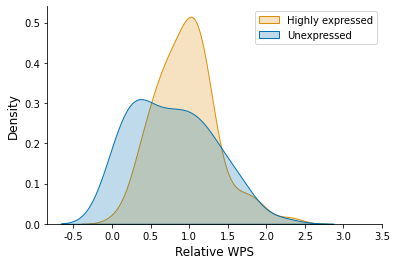

In [10]:
a = sns.kdeplot(x='mean_ndr', data=df.iloc[:160,], hue='name', shade=True, palette='colorblind')
plt.ylabel('Density', fontsize=12)
plt.xlabel('Relative WPS', fontsize=12)
plt.legend(loc='upper right', labels=['Highly expressed', 'Unexpressed'])
xticks = [-0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5]
xticklabels = [-0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5]
a.set_xticks(xticks)
a.set_xticklabels(xticklabels)
sns.despine()       
plt.savefig(f'bm_wps.png',dpi=300)

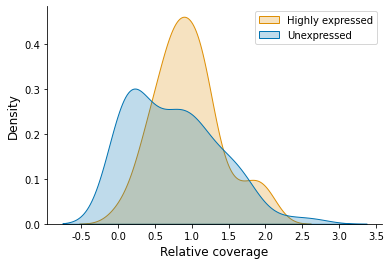

In [11]:
a = sns.kdeplot(x='mean_ndr', data=df.iloc[160:,], hue='name', shade=True, palette='colorblind')
plt.ylabel('Density', fontsize=12)
plt.xlabel('Relative coverage', fontsize=12)
plt.legend(loc='upper right', labels=['Highly expressed', 'Unexpressed'])
a.set_xticks(xticks)
a.set_xticklabels(xticklabels)
sns.despine()       
plt.savefig(f'bm_cov.png',dpi=300)